<a href="https://colab.research.google.com/github/michaelyoung1997/Development-of-AI-tools-to-link-climate-and-land-usage/blob/master/Kriging_Spatial_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
lst_both=pd.read_csv('/content/drive/My Drive/Project/lst_both.csv', index_col=0)
lst07_ge=pd.read_csv('/content/drive/My Drive/Project/lst07_gee.csv', index_col=0)
lst07=pd.read_csv('/content/drive/My Drive/Project/lst07.csv', index_col=0)
lst15=pd.read_csv('/content/drive/My Drive/Project/lst15.csv', index_col=0)
targets=pd.read_csv('/content/drive/My Drive/Project/targets.csv', index_col=0)

In [ ]:
combined07=pd.concat([lst07, targets], join='inner', axis=1)
combined15=pd.concat([lst15, targets], join='inner', axis=1)

combined07

,Northing,Easting,Broadleaf woodland,Coniferous woodland,Arable,Improved Grassland,Semi-natural grassland,Mountain Heath,Saltwater,Freshwater,Coastal,Built-up/gardens,elevation,pop_density,Feb_2007_EVI,Jul_2007_EVI,Nov_2007_EVI,Inland,topography,Mineral,Organic Mineral,Organic,Feb_2007_LST,Jul_2007_LST,Nov_2007_LST,Feb_2015_LST,Jul_2015_LST,Nov_2015_LST,LST_2007,LST_2015
0,661.0,348.0,5,9,15,29,27,6,0,0,0,3,224,2.820140,0.237948,0.350908,0.237948,38.013156,142.0,0.0,1.0,0.0,13927.727273,14543.400000,13905.375000,13886.000000,14451.500000,13966.375000,14176.489796,14190.820225
1,849.0,367.0,6,3,0,40,18,27,0,0,0,0,160,3.071964,0.137649,0.308139,0.137649,29.966648,281.0,0.0,1.0,0.0,13992.666667,14504.200000,13944.000000,13735.714286,14672.400000,14050.000000,14290.393617,14255.923077
2,866.0,369.0,7,0,2,59,7,0,0,0,0,17,101,89.064470,0.238271,0.223778,0.238271,38.600518,28.0,0.0,1.0,0.0,13950.444444,14162.000000,13912.500000,13836.333333,14481.166667,14009.500000,14202.323810,14318.153846
3,1059.0,336.0,7,2,58,17,8,0,0,0,0,0,87,18.957787,0.126493,0.335886,0.126493,53.851648,-59.0,1.0,0.0,0.0,13891.555556,14670.555556,13984.666667,13909.857143,14681.833333,14039.000000,14302.655462,14335.524272
4,1085.0,525.0,14,0,35,25,0,0,0,0,0,20,62,627.128300,0.149533,0.266729,0.149533,67.475922,-22.0,1.0,0.0,0.0,13929.000000,14715.000000,14102.444444,13960.875000,15053.500000,14138.166667,14391.133929,14395.432692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1190.0,539.0,5,0,26,53,3,0,0,0,0,7,86,472.045070,0.240806,0.291955,0.240806,5.830952,274.0,0.0,1.0,0.0,14019.375000,14667.666667,14134.888889,13923.285714,14876.833333,13475.500000,14424.739130,14461.098039
9996,548.0,303.0,3,8,2,10,13,57,0,1,0,0,358,2.517340,0.124496,0.253098,0.124496,47.885280,-142.0,1.0,0.0,0.0,13843.800000,14507.333333,13894.916667,13873.666667,14544.000000,13884.571429,14197.608247,14196.988235
9997,1173.0,272.0,7,2,15,65,3,0,0,0,0,1,109,22.139850,0.196956,0.270083,0.196956,22.847319,-27.0,1.0,0.0,0.0,14058.750000,14656.000000,14016.750000,13922.555556,14650.000000,13875.833333,14395.715686,14346.495238
9998,1007.0,397.0,2,0,3,11,0,0,0,0,0,80,131,4554.672400,0.070320,0.166667,0.070320,113.718952,19.0,1.0,0.0,0.0,13994.857143,14806.222222,14130.500000,13983.111111,14982.000000,14071.500000,14525.093458,14432.736842


In [ ]:
!pip install rasterio 
import rasterio
!pip install pykrige

     |████████████████████████████████| 18.2MB 229kB/s 
     |████████████████████████████████| 972kB 7.6MB/s 


In [ ]:
altitudes= rasterio.open('/content/drive/My Drive/Project/uk_dem_bng2.tif').read(1)
altitudes.shape

(2600, 1400)

In [ ]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
# altitude = OrdinaryKriging(lst07['Easting'], lst07['Northing'], lst['elevation'], variogram_model='spherical',
#                      verbose=False, enable_plotting=False, nlags=50)

In [ ]:
gridx = np.arange(0.0, 700, 5)
gridy = np.arange(0.0, 1300, 5)

landmask=np.loadtxt('/content/drive/My Drive/Project/total_landcover')>80


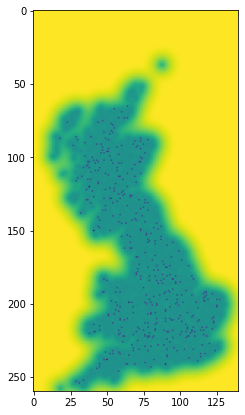

In [ ]:
plt.figure(figsize=(13,7))
plt.imshow(ss)


In [ ]:
z.data.shape

(260, 140)

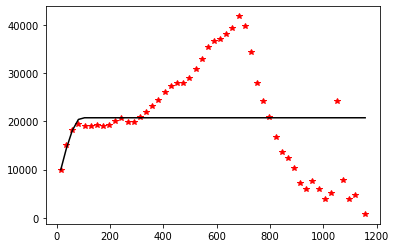

In [ ]:
OK.display_variogram_model()

In [ ]:
OK_lst_july = OrdinaryKriging(lst['Easting'], lst['Northing'], lst['July_2007_LST'], variogram_model='spherical',
                     verbose=False, enable_plotting=False, nlags=50)

NameError: ignored

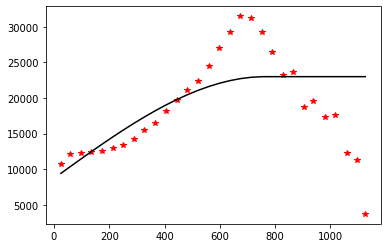

In [ ]:
OK_lst_july.display_variogram_model()

In [ ]:
OK_lst_feb = OrdinaryKriging(lst['Easting'], lst['Northing'], lst['Feb_2007_LST'], variogram_model='gaussian',
                     verbose=False, enable_plotting=False, nlags=30)

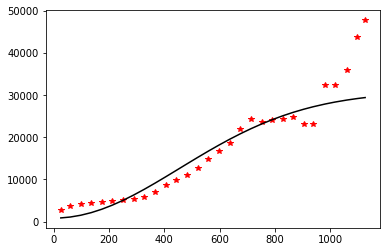

In [ ]:
OK_lst_feb.display_variogram_model() 

(None, None, None)

**Kriging for whole altitude grid**

In [ ]:
shape=list(altitudes.shape)
shape.append(2)
coordinates=np.zeros(shape)

In [ ]:
for i in range(coordinates.shape[0]):
  for j in range(coordinates.shape[1]):
    coordinates[i,j,0]=i/2
    coordinates[i,j,1]=j/2

In [ ]:
coordinates[:,:,0]

array([   0. ,    0. ,    0. , ..., 1299.5, 1299.5, 1299.5])

In [ ]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

OK = OrdinaryKriging(coordinates[:,:,1].flatten(), coordinates[:,:,0].flatten(), altitudes.flatten(), variogram_model='gaussian',
                     verbose=False, enable_plotting=False, nlags=15)

NameError: ignored

In [ ]:
combined

,Northing,Easting,Broadleaf woodland,Coniferous woodland,Arable,Improved Grassland,Semi-natural grassland,Mountain Heath,Saltwater,Freshwater,Coastal,Built-up/gardens,elevation,pop_density,Feb_2007_EVI,Jul_2007_EVI,Nov_2007_EVI,Inland,topography,Mineral,Organic Mineral,Organic,Feb_2007_LST,Jul_2007_LST,Nov_2007_LST,Feb_2015_LST,Jul_2015_LST,Nov_2015_LST,Northing,Easting,Broadleaf woodland,Coniferous woodland,Arable,Improved Grassland,Semi-natural grassland,Mountain Heath,Saltwater,Freshwater,Coastal,Built-up/gardens,elevation,pop_density,Feb_2015_EVI,Jul_2015_EVI,Nov_2015_EVI,Inland,topography,Mineral,Organic Mineral,Organic
0,661.0,348.0,5,9,15,29,27,6,0,0,0,3,224,2.820140,0.237948,0.350908,0.237948,38.013156,142.0,0.0,1.0,0.0,13927.727273,14543.400000,13905.375000,13886.000000,14451.500000,13966.375000,661.0,348.0,7,6,4,46,24,3,0,0,0,4,224,2.820140,0.266497,0.409058,0.184043,38.013156,142.0,0.0,1.0,0.0
1,849.0,367.0,6,3,0,40,18,27,0,0,0,0,160,3.071964,0.137649,0.308139,0.137649,29.966648,281.0,0.0,1.0,0.0,13992.666667,14504.200000,13944.000000,13735.714286,14672.400000,14050.000000,849.0,367.0,4,3,0,48,16,23,0,0,0,0,160,3.071964,0.162542,0.407614,0.111527,29.966648,281.0,0.0,1.0,0.0
2,866.0,369.0,7,0,2,59,7,0,0,0,0,17,101,89.064470,0.238271,0.223778,0.238271,38.600518,28.0,0.0,1.0,0.0,13950.444444,14162.000000,13912.500000,13836.333333,14481.166667,14009.500000,866.0,369.0,7,0,3,64,1,0,0,0,0,18,101,89.064470,0.186747,0.397120,0.138902,38.600518,28.0,0.0,1.0,0.0
3,1059.0,336.0,7,2,58,17,8,0,0,0,0,0,87,18.957787,0.126493,0.335886,0.126493,53.851648,-59.0,1.0,0.0,0.0,13891.555556,14670.555556,13984.666667,13909.857143,14681.833333,14039.000000,1059.0,336.0,12,1,36,44,1,0,0,0,0,0,87,18.957787,0.204028,0.376539,0.124088,53.851648,-59.0,1.0,0.0,0.0
4,1085.0,525.0,14,0,35,25,0,0,0,0,0,20,62,627.128300,0.149533,0.266729,0.149533,67.475922,-22.0,1.0,0.0,0.0,13929.000000,14715.000000,14102.444444,13960.875000,15053.500000,14138.166667,1085.0,525.0,13,0,37,22,0,0,0,0,0,23,62,627.128300,0.143604,0.277279,0.115658,67.475922,-22.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1190.0,539.0,5,0,26,53,3,0,0,0,0,7,86,472.045070,0.240806,0.291955,0.240806,5.830952,274.0,0.0,1.0,0.0,14019.375000,14667.666667,14134.888889,13923.285714,14876.833333,13475.500000,1190.0,539.0,4,0,33,40,7,0,0,0,0,10,86,472.045070,0.198226,0.295441,0.135897,5.830952,274.0,0.0,1.0,0.0
9996,548.0,303.0,3,8,2,10,13,57,0,1,0,0,358,2.517340,0.124496,0.253098,0.124496,47.885280,-142.0,1.0,0.0,0.0,13843.800000,14507.333333,13894.916667,13873.666667,14544.000000,13884.571429,548.0,303.0,6,9,1,12,8,56,0,1,0,0,358,2.517340,0.160204,0.294875,0.066827,47.885280,-142.0,1.0,0.0,0.0
9997,1173.0,272.0,7,2,15,65,3,0,0,0,0,1,109,22.139850,0.196956,0.270083,0.196956,22.847319,-27.0,1.0,0.0,0.0,14058.750000,14656.000000,14016.750000,13922.555556,14650.000000,13875.833333,1173.0,272.0,8,2,18,64,0,0,0,0,0,2,109,22.139850,0.217372,0.318697,0.105915,22.847319,-27.0,1.0,0.0,0.0
9998,1007.0,397.0,2,0,3,11,0,0,0,0,0,80,131,4554.672400,0.070320,0.166667,0.070320,113.718952,19.0,1.0,0.0,0.0,13994.857143,14806.222222,14130.500000,13983.111111,14982.000000,14071.500000,1007.0,397.0,2,0,1,7,0,0,0,0,0,84,131,4554.672400,0.073894,0.182156,0.010576,113.718952,19.0,1.0,0.0,0.0


ALtitude 

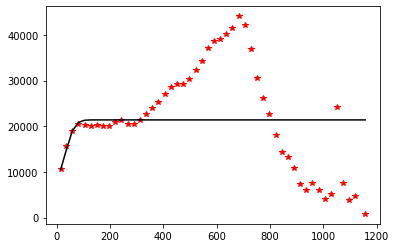

In [ ]:
altitude = OrdinaryKriging(lst07['Easting'], lst07['Northing'], lst07['elevation'], variogram_model='gaussian',
                     verbose=False, enable_plotting=False, nlags=50)

altitude.display_variogram_model() 

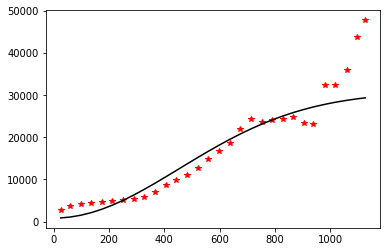

In [ ]:
feb=OrdinaryKriging(combined07['Easting'], combined07['Northing'], combined07['Feb_2007_LST'], variogram_model='gaussian',
                     verbose=False, enable_plotting=False, nlags=30)
feb.display_variogram_model() 

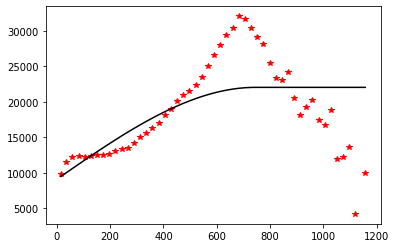

In [ ]:
OrdinaryKriging(combined07['Easting'], combined07['Northing'], combined07['Jul_2007_LST'], variogram_model='spherical',
                     verbose=False, enable_plotting=False, nlags=50).display_variogram_model() 

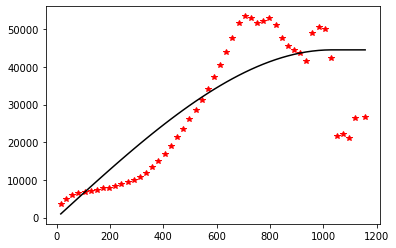

In [ ]:
OrdinaryKriging(combined07['Easting'], combined07['Northing'], combined07['Nov_2007_LST'], variogram_model='spherical',
                     verbose=False, enable_plotting=False, nlags=50).display_variogram_model() 

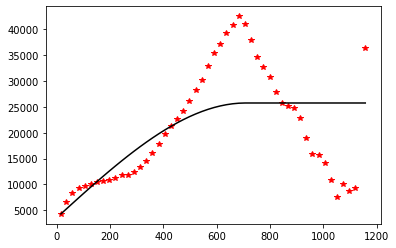

In [ ]:
OrdinaryKriging(combined15['Easting'], combined15['Northing'], combined15['Feb_2015_LST'], variogram_model='spherical',
                     verbose=False, enable_plotting=False, nlags=50).display_variogram_model() 

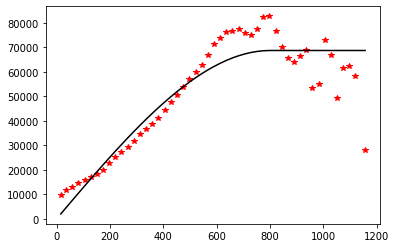

In [ ]:
OrdinaryKriging(combined15['Easting'], combined15['Northing'], combined15['Jul_2015_LST'], variogram_model='spherical',
                     verbose=False, enable_plotting=False, nlags=50).display_variogram_model() 

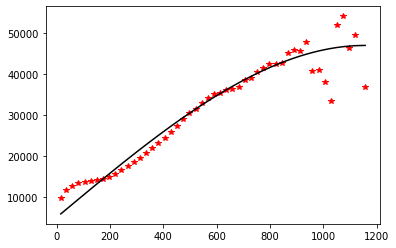

In [ ]:
OrdinaryKriging(combined15['Easting'], combined15['Northing'], combined15['Nov_2015_LST'], variogram_model='spherical',
                     verbose=False, enable_plotting=False, nlags=50).display_variogram_model() 